# Laura Hoffmann
# DSC 530 Data Exploration and Analysis
# Term Project

In [1]:
import os
print(os.getcwd())

import pandas as pd

import thinkstats2
import thinkplot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Laura\Data Exploration and Analysis\ThinkStats2-master\code


#### Before reading my data on Jupyter Notebook I opened it in Excel to delete any duplicate data entries and found there were over 400 repeated entries (that matched in every variable). Those were removed and then the file was resaved and uploaded here.

In [2]:
beerdata = pd.read_csv("beer_reviews.csv") 
  
beerdata.drop(["beer_beerid", "beer_name", "brewery_name", "review_profilename"], axis = 1, inplace = True) 

In [3]:
beerdata.isnull().sum()
beerabv = beerdata.beer_abv

In [4]:
newdata = beerdata.fillna(beerabv.mean())

In [5]:
# Variables
overall = newdata.review_overall
aroma = newdata.review_aroma
appear = newdata.review_appearance
palate = newdata.review_palate
taste = newdata.review_palate
abv = newdata.beer_abv
style = newdata.beer_style

## Histograms

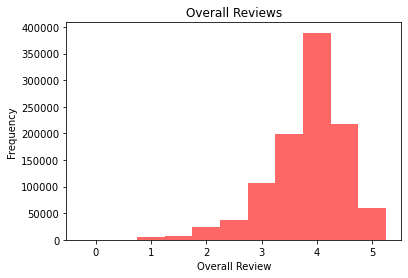

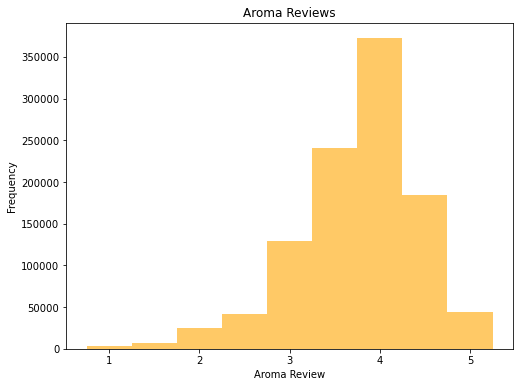

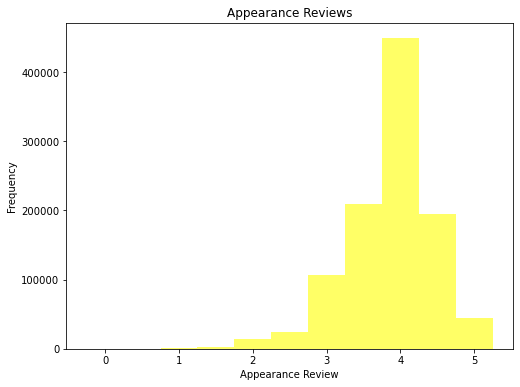

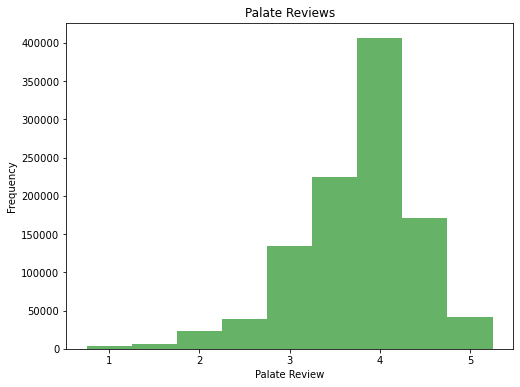

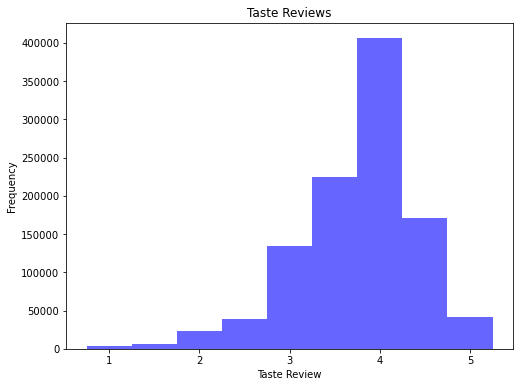

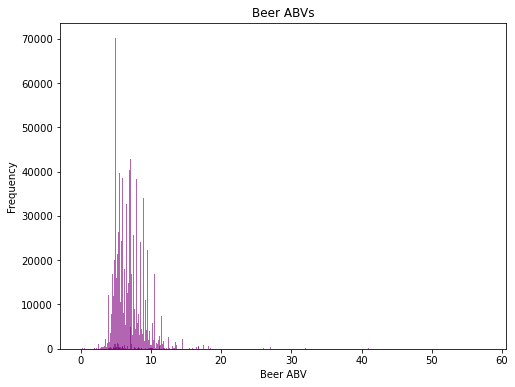

<Figure size 576x432 with 0 Axes>

In [6]:
# Histogram 1, Overall Reviews
hist1 = thinkstats2.Hist(overall)
thinkplot.Hist(hist1, width=.5, color="red")
thinkplot.Show(xlabel="Overall Review", ylabel="Frequency", title="Overall Reviews")

# Histogram 2, Aroma Reviews
hist2 = thinkstats2.Hist(aroma)
thinkplot.Hist(hist2, width=.5, color="orange")
thinkplot.Show(xlabel="Aroma Review", ylabel="Frequency", title="Aroma Reviews")

# Histogram 3, Appearance Reviews
hist3 = thinkstats2.Hist(appear)
thinkplot.Hist(hist3, width=.5, color="yellow")
thinkplot.Show(xlabel="Appearance Review", ylabel="Frequency", title="Appearance Reviews")

# Histogram 4, Palate Reviews
hist4 = thinkstats2.Hist(palate)
thinkplot.Hist(hist4, width=.5, color="green")
thinkplot.Show(xlabel="Palate Review", ylabel="Frequency", title="Palate Reviews")

# Histogram 5, Taste Reviews
hist5 = thinkstats2.Hist(taste)
thinkplot.Hist(hist5, width=.5, color="blue")
thinkplot.Show(xlabel="Taste Review", ylabel="Frequency", title="Taste Reviews")

# Histogram 6, ABVs
hist6 = thinkstats2.Hist(abv)
thinkplot.Hist(hist6, width=.1, color="purple")
thinkplot.Show(xlabel="Beer ABV", ylabel="Frequency", title="Beer ABVs")


### All of the review data is left skewed with tails extending farther to the left than the right, while the ABV data is right skewed and has a much longer tail extedning to the right. This is because for the reviews most of the data falls on the higher end of the spectrum and there are a few points on the lower end. For the ABV data we can see that there are mostly points on the lower end with a mode around 5 and there are a few points that go way higher than that leaving that data visually skewed to the right with a long (but small) tail since.
#### Some of the data in the ABV histogram is barely visible but there are points going up to 57.7%. In addition, one of the reasons that the mode is 5 is because there were some datapoints missing the ABV and those were filled in with the mean.

## Statistics

In [7]:
import statistics

def printstats(variable):
    print("Mean:", round(statistics.mean(variable),2))
    print("Mode:", statistics.mode(variable))
    print("Spread:", round(statistics.variance(variable),2))

# Overall Reviews
print("***Overall***")
printstats(overall)

# Aroma Reviews
print("***Aroma***")
printstats(aroma)

# Appearance Reviews
print("***Appearance***")
printstats(appear)

# Palate Reviews
print("***Palate***")
printstats(palate)

# Taste Reviews
print("***Taste***")
printstats(taste)

# ABVs
print("***ABVs***")
printstats(abv)

***Overall***
Mean: 3.83
Mode: 4.0
Spread: 0.5
***Aroma***
Mean: 3.76
Mode: 4.0
Spread: 0.46
***Appearance***
Mean: 3.86
Mode: 4.0
Spread: 0.36
***Palate***
Mean: 3.76
Mode: 4.0
Spread: 0.44
***Taste***
Mean: 3.76
Mode: 4.0
Spread: 0.44
***ABVs***
Mean: 7.07
Mode: 5.0
Spread: 5.15


In [ ]:
newdata['beer_style'].value_counts()

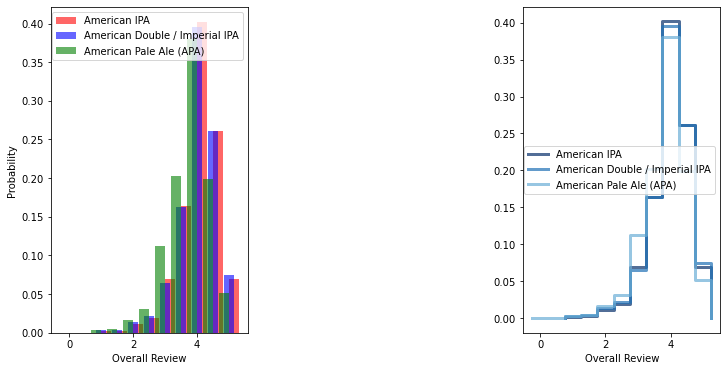

<Figure size 576x432 with 0 Axes>

In [41]:
Aipa = newdata[newdata.beer_style=="American IPA"]
Adub = newdata[newdata.beer_style=="American Double / Imperial IPA"]
Apal = newdata[newdata.beer_style=="American Pale Ale (APA)"]

Aipa_pmf = thinkstats2.Pmf(Aipa.review_overall, label='American IPA')
Adub_pmf = thinkstats2.Pmf(Adub.review_overall, label='American Double / Imperial IPA')
Apal_pmf = thinkstats2.Pmf(Apal.review_overall, label='American Pale Ale (APA)')


thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(Aipa_pmf, color='red', align='left', width=.3)
thinkplot.Hist(Adub_pmf, color='blue', align='center', width=.3)
thinkplot.Hist(Apal_pmf, color='green', align='right', width=.3)
thinkplot.Config(xlabel='Overall Review', ylabel='Probability')

thinkplot.PrePlot(3)
thinkplot.SubPlot(3)
thinkplot.Pmfs([Aipa_pmf, Adub_pmf, Apal_pmf])
thinkplot.Show(xlabel='Overall Review')